In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

In [3]:
df = pd.read_csv("zomato.csv")
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [4]:
##RATING CLEANING ##

#change data type of "rate" column 
def clean_rate(val):
    if(val=='NEW' or val=='-'):
        return np.nan
    else:
        return float(str(val).split('/')[0])
    
df['rate']=df['rate'].apply(clean_rate)

In [6]:
#fill missing values in rating feature with mode value imputation
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [5]:
##AVERAGE COST ##
#REMOVE ',' Present in the column For example 1,200 is converted in to 1200
df['costfor2'] = df['approx_cost(for two people)'].replace({',': ''}, regex=True)
# convert costfor2 into float value - astype cannot be used 
pd.to_numeric(df['costfor2'],errors='coerce')
df['costfor2']=pd.to_numeric(df['costfor2'],errors='coerce')
#remove redundant columns - approx_cost(for two people) 
df.drop(columns=['approx_cost(for two people)'],inplace=True)
#fill missing values in costfor2 feature with median value imputation
df['costfor2'].fillna(df['costfor2'].median(),inplace=True)

In [8]:
# remove the feature's that are not useful for the analysis 
df.drop(columns=['url','address','phone','reviews_list','menu_item'],inplace=True)

In [10]:
df.drop(columns=['location'],inplace=True)

In [11]:
#Rename listed_in(type) and listed_in(city) with appropriate name 

df.rename(columns={'listed_in(city)':'location_city','listed_in(type)' : 'resturant_type' },inplace=True)

In [15]:
top_20_rest = df[df['name'].isin(df['name'].value_counts().head(20).index.tolist())]


In [54]:
df.head(2)

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,resturant_type,location_city,costfor2
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",Buffet,Banashankari,800.0
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",Buffet,Banashankari,800.0


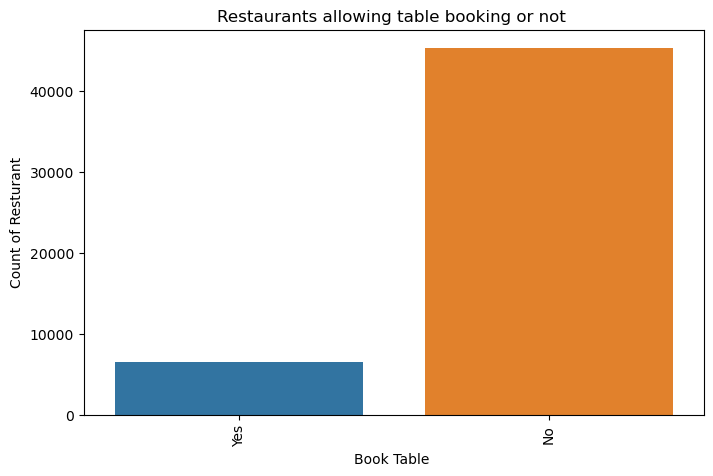

In [13]:
#Restaurants allowing table booking or not
#Features : name , book_table
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'book_table')
plt.xlabel('Book Table ')
plt.ylabel('Count of Resturant')
plt.title('Restaurants allowing table booking or not ')
plt.xticks(rotation=90)
plt.show()

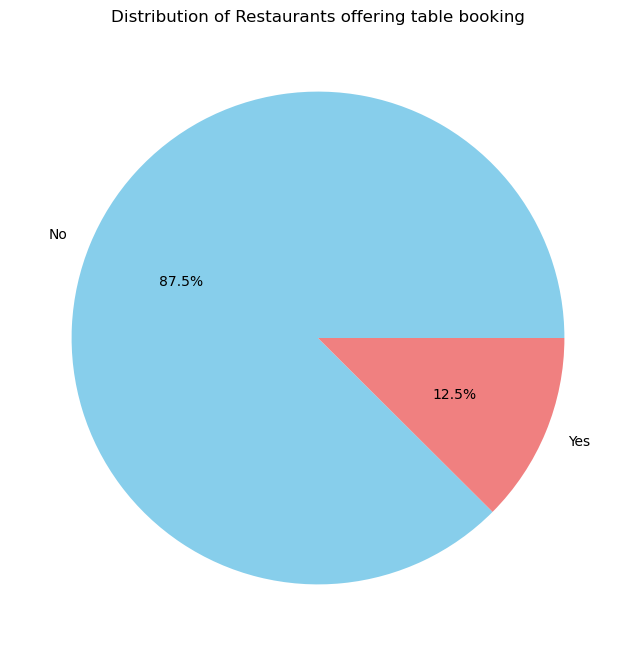

In [14]:
#Distribution of Restaurants Offering table booking 
online_order_counts = df['book_table'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(online_order_counts, labels=online_order_counts.index.astype(str), autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Restaurants offering table booking')
plt.show()

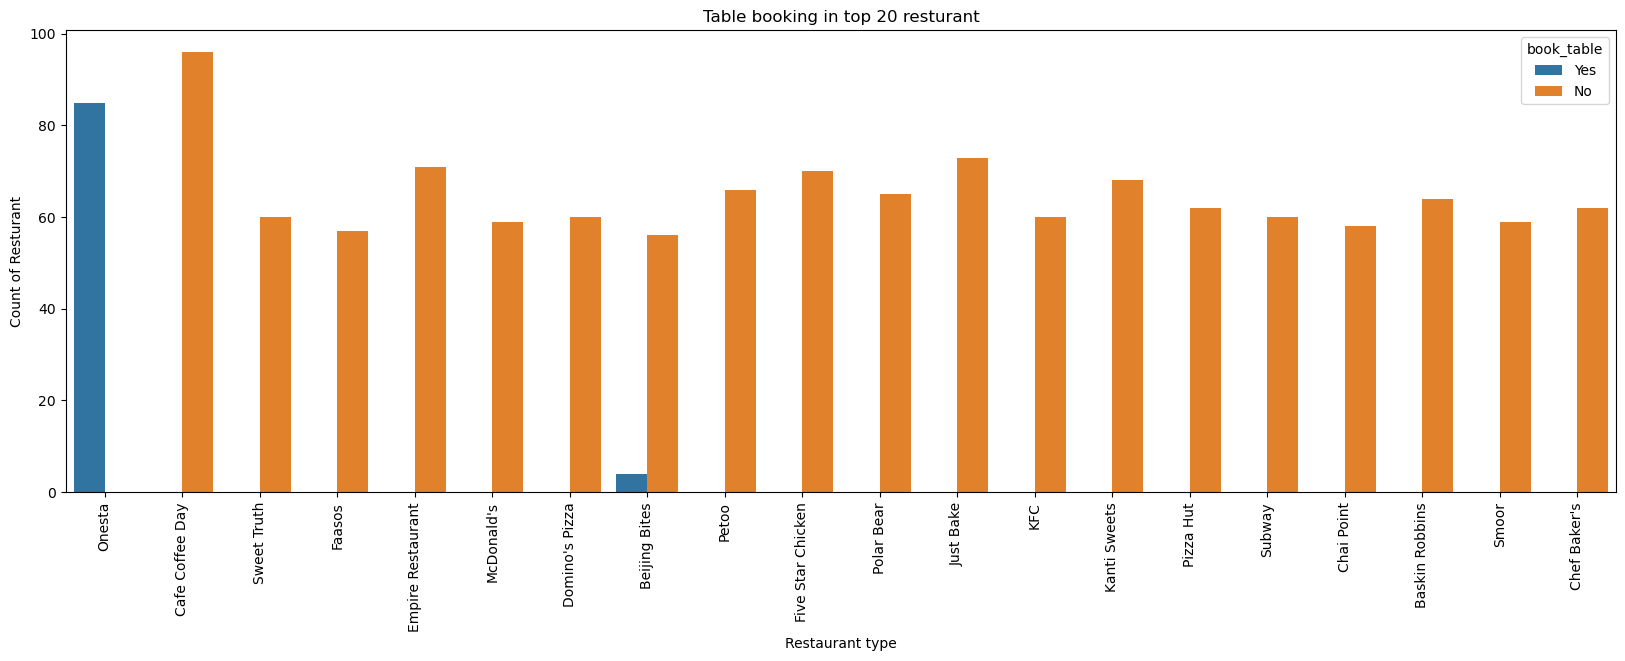

In [45]:
#Availabilty of Table booking service in top 20 resturant
plt.figure(figsize=(20, 6))
sns.countplot( data = top_20_rest,  x = top_20_rest['name'], hue = df['book_table'])
plt.xlabel('Restaurant type')
plt.ylabel('Count of Resturant')
plt.title('Table booking in top 20 resturant')
plt.xticks(rotation=90)
plt.show() 

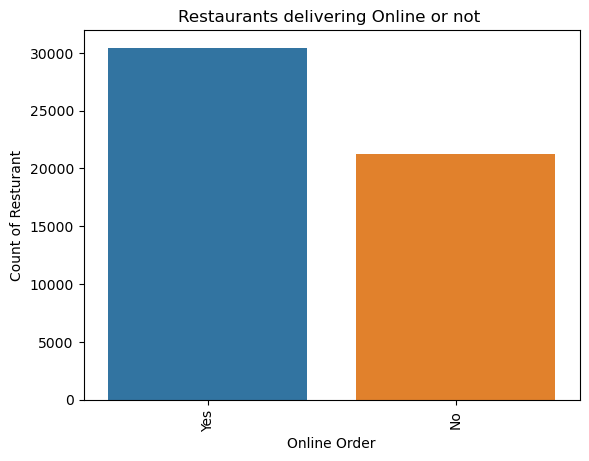

In [20]:
#Restaurants delivering Online or not
#Features:online_order

sns.countplot(x = df['online_order'])
plt.xlabel('Online Order')
plt.ylabel('Count of Resturant')
plt.title('Restaurants delivering Online or not ')
plt.xticks(rotation=90)
plt.show()

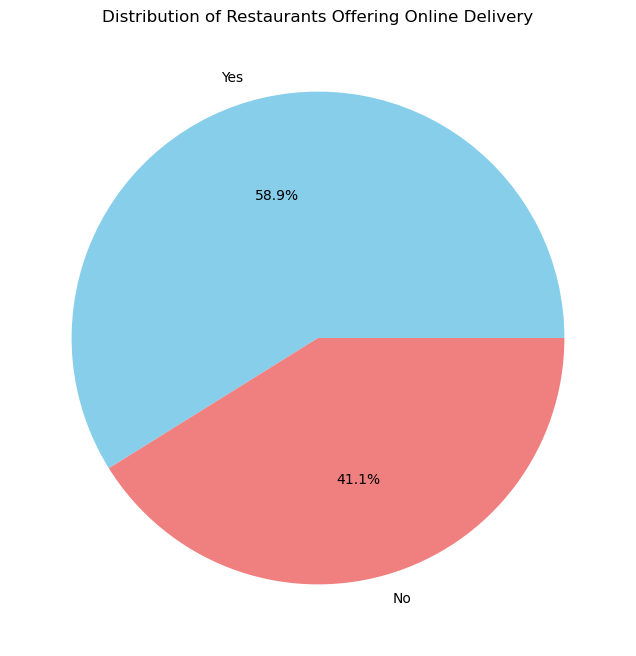

In [21]:
#Distribution of Restaurants Offering Online Delivery
online_order_counts = df['online_order'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(online_order_counts, labels=online_order_counts.index.astype(str), autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Restaurants Offering Online Delivery')
plt.show()

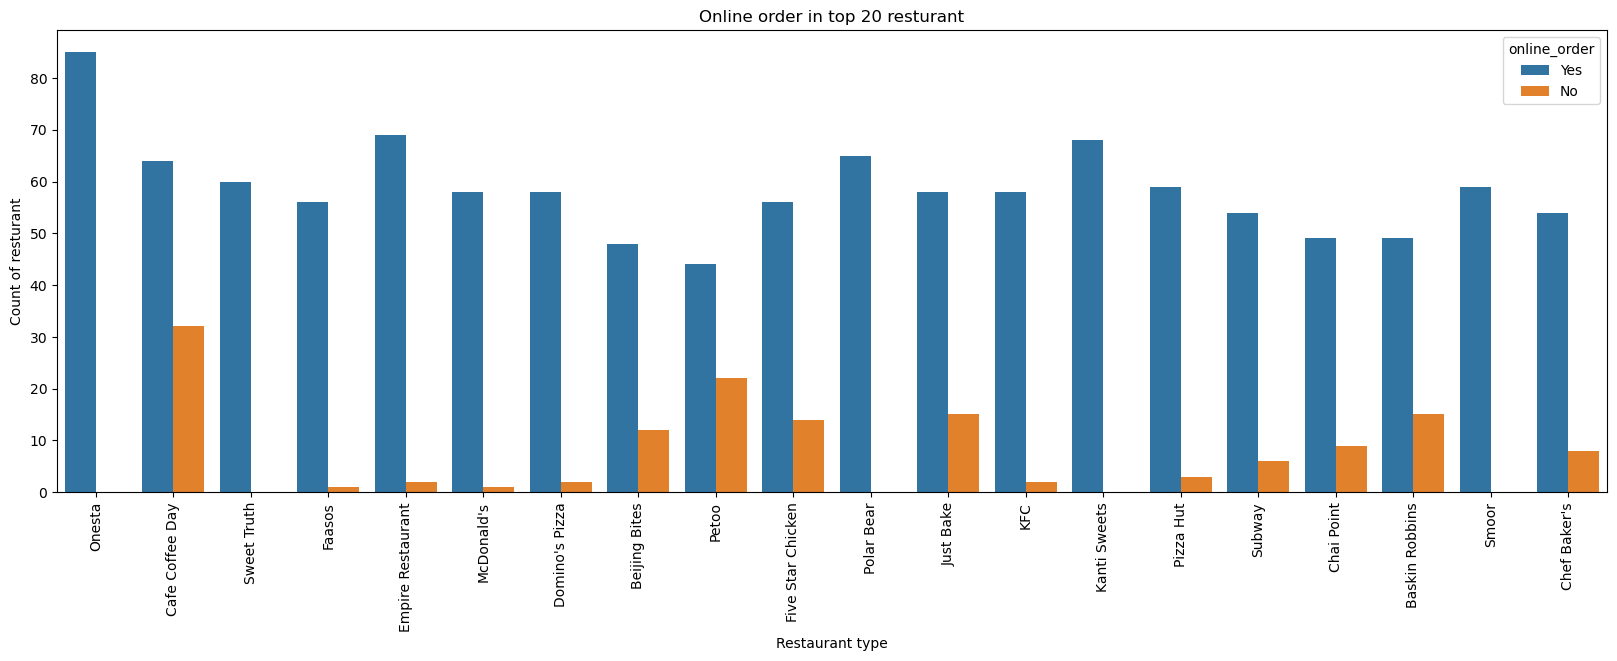

In [44]:
#Online order in top 20 restaurant
plt.figure(figsize=(20, 6))
sns.countplot( data = top_20_rest,  x = top_20_rest['name'], hue = df['online_order'])
plt.xlabel('Restaurant type')
plt.ylabel('Count of resturant')
plt.title('Online order in top 20 resturant')
plt.xticks(rotation=90)
plt.show()  

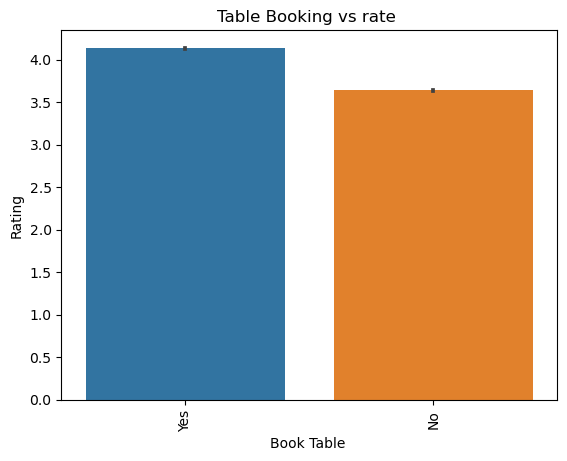

In [25]:
#Table booking Rate vs Rate
#Features : book_table, rate

sns.barplot( x = df['book_table'], y=df['rate'])
plt.xlabel('Book Table ')
plt.ylabel('Rating')
plt.title('Table Booking vs rate ')
plt.xticks(rotation=90)
plt.show()

In [26]:
top_loc = df.groupby('location_city')['rate'].mean()
top_loc = top_loc.sort_values(ascending=False)
top_loc.values


array([3.7871021 , 3.78637505, 3.78492251, 3.76815901, 3.76429379,
       3.75170224, 3.74851528, 3.74846646, 3.74759903, 3.73824564,
       3.7162087 , 3.71347343, 3.71206948, 3.70622991, 3.70585552,
       3.69599276, 3.67202849, 3.66994829, 3.66505117, 3.66007333,
       3.65284605, 3.64888568, 3.64460908, 3.64369273, 3.64043594,
       3.61332247, 3.59582685, 3.59163854, 3.58303487, 3.56190397])

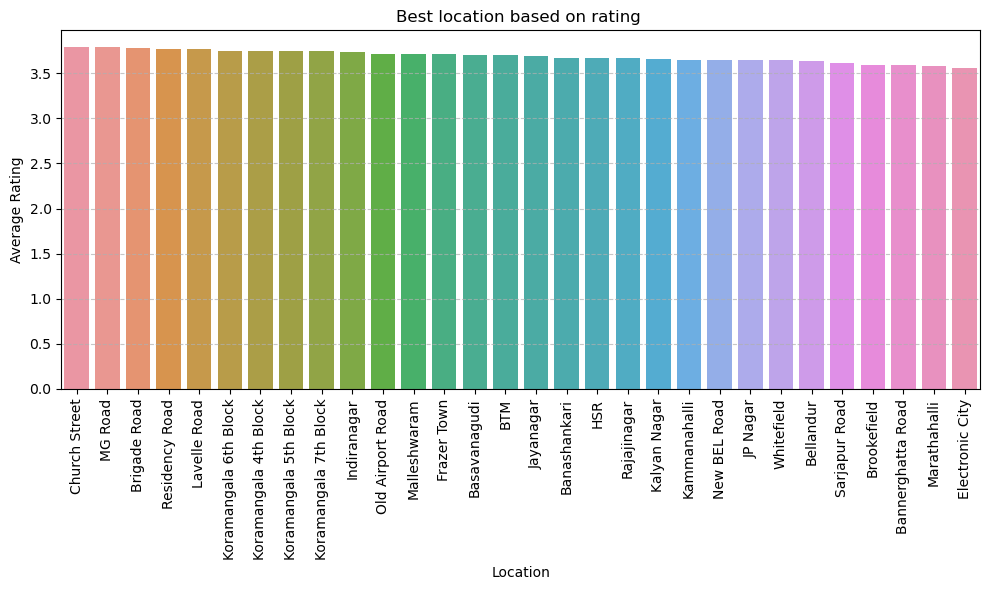

In [27]:
#Best Location
#Features : 
plt.figure(figsize=(10, 6))
sns.barplot(x = top_loc.index , y = top_loc.values )
plt.title('Best location based on rating ')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

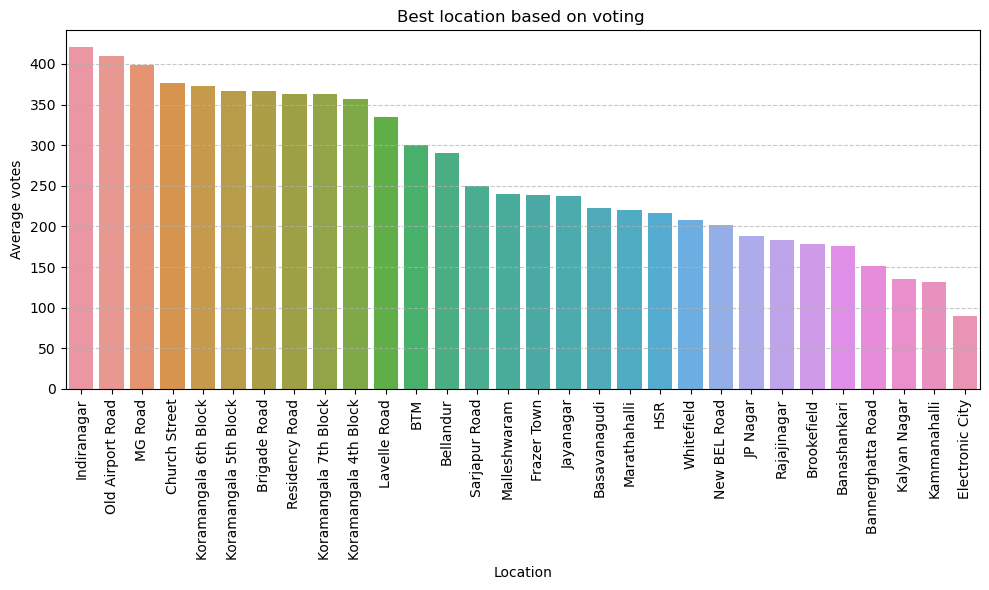

In [28]:
#Best location based on votes 
top_loc_vote = df.groupby('location_city')['votes'].mean()
top_loc_vote = top_loc_vote.sort_values(ascending=False)
top_loc_vote.values
plt.figure(figsize=(10, 6))
sns.barplot(x = top_loc_vote.index , y = top_loc_vote.values )
plt.title('Best location based on voting ')
plt.xlabel('Location')
plt.ylabel('Average votes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

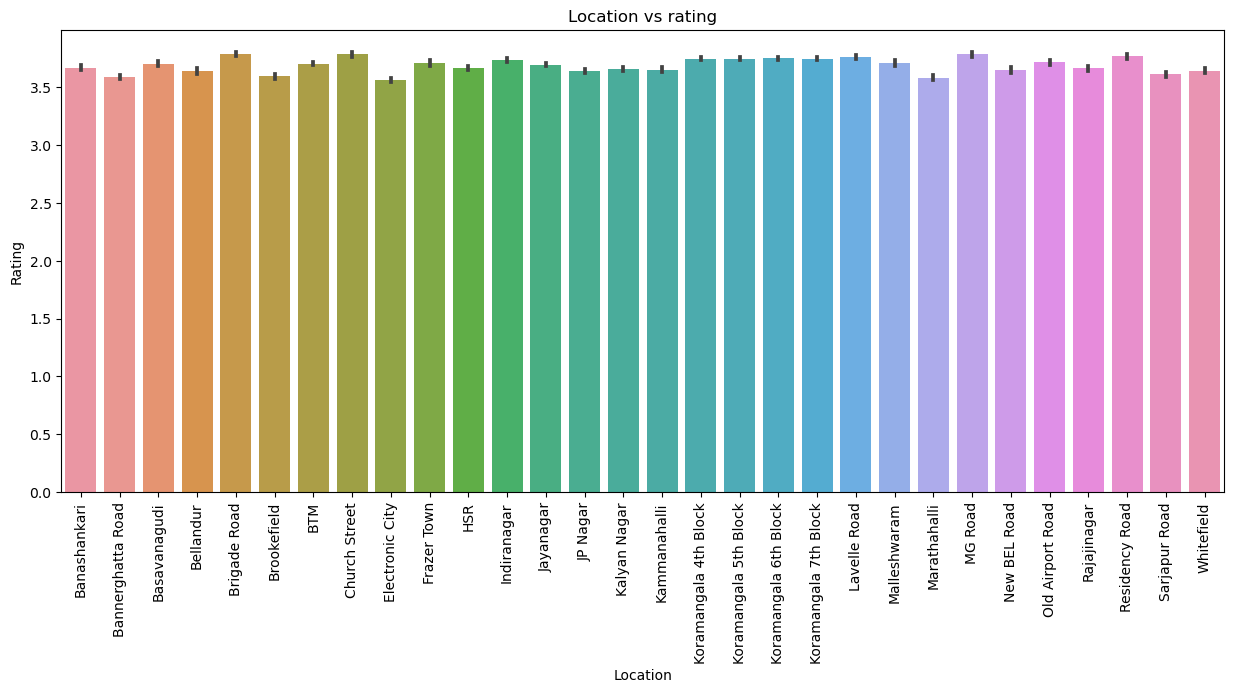

In [29]:
#Relation between Location and Rating
#Features : location_city , rate
plt.figure(figsize=(15, 6))
sns.barplot(data =df, x = 'location_city', y = 'rate')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.title('Location vs rating')
plt.xticks(rotation=90)
plt.show()

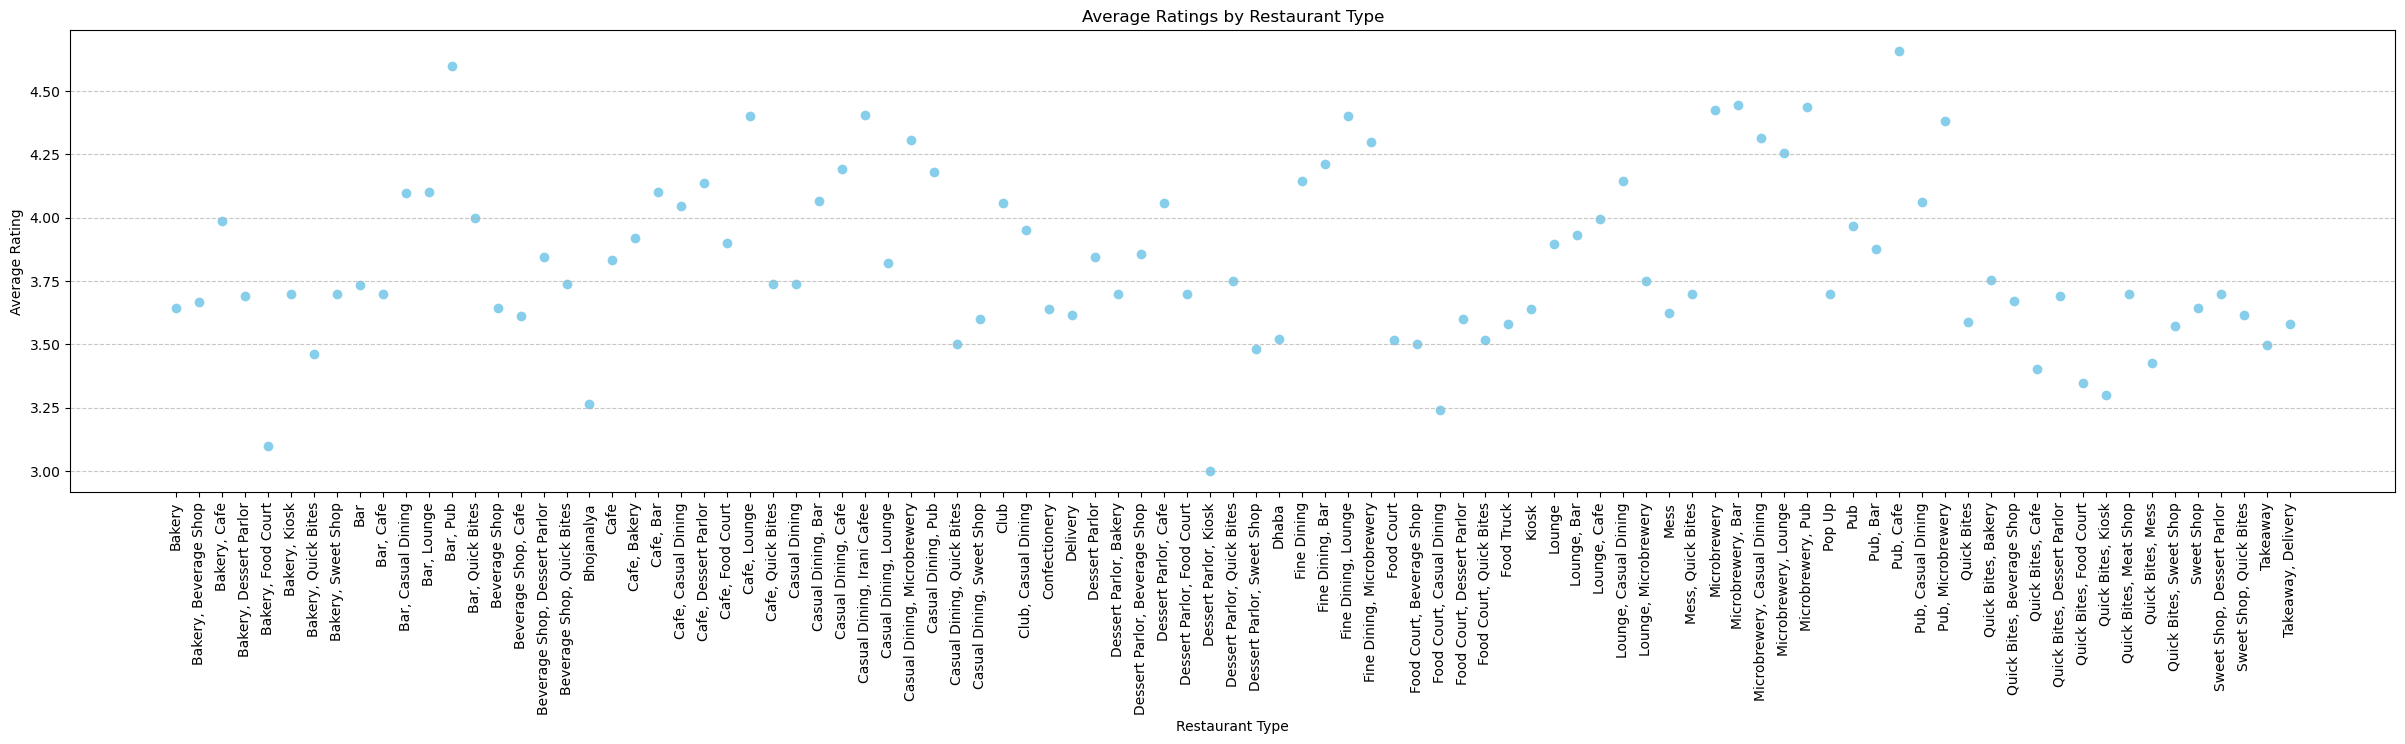

In [42]:
#Gaussian Rest type and Rating


mean_rate = df.groupby('rest_type')['rate'].mean()
plt.figure(figsize=(30, 6))
plt.scatter(mean_rate.index, mean_rate.values, color='skyblue')
plt.title('Average Ratings by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

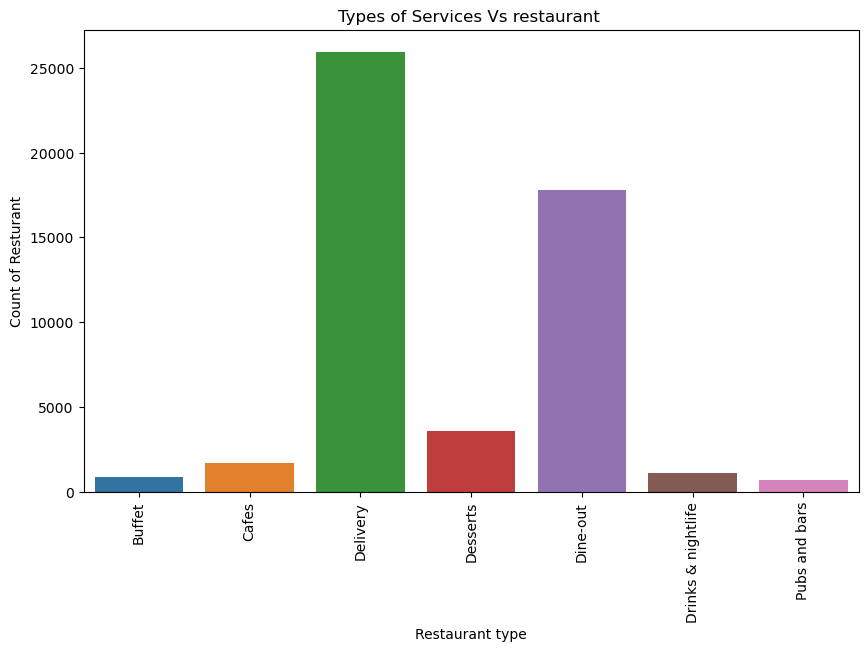

In [40]:
#Types of Services Vs restaurants 
plt.figure(figsize=(10, 6))
sns.countplot(x = df['resturant_type'])
plt.xlabel('Restaurant type')
plt.ylabel('Count of Resturant')
plt.title('Types of Services Vs restaurant ')
plt.xticks(rotation=90)
plt.show()

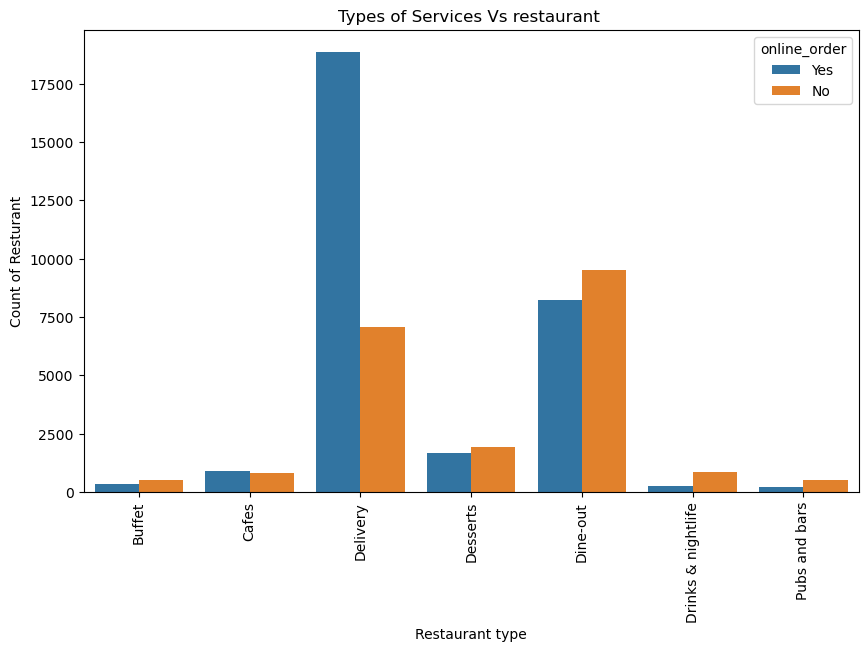

In [39]:
#Type of Resturant Vs Online Order 
plt.figure(figsize=(10, 6))
sns.countplot( x = df['resturant_type'], hue = df['online_order'])
plt.xlabel('Restaurant type')
plt.ylabel('Count of Resturant')
plt.title('Types of Services Vs restaurant ')
plt.xticks(rotation=90)
plt.show() 

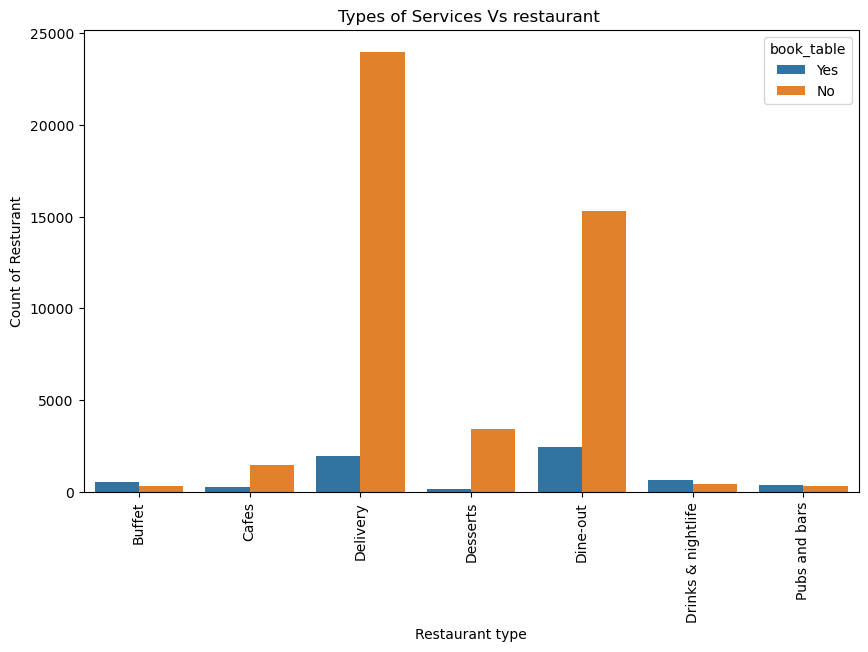

In [38]:
#Type of Resturant Vs Tablebooking 
plt.figure(figsize=(10, 6))
sns.countplot( x = df['resturant_type'], hue = df['book_table'])
plt.xlabel('Restaurant type')
plt.ylabel('Count of Resturant')
plt.title('Types of Services Vs restaurant ')
plt.xticks(rotation=90)
plt.show() 

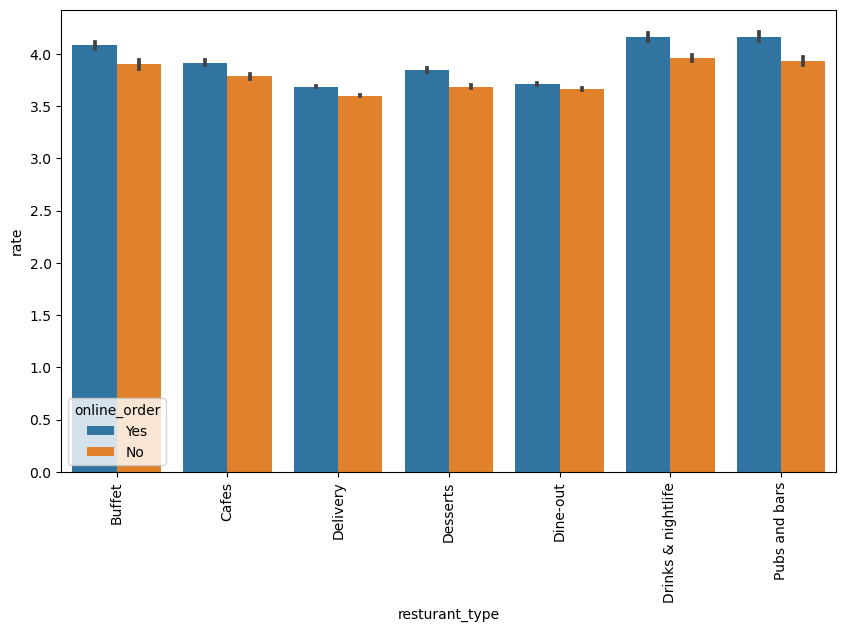

In [37]:
#Relation between Type and Rating
#Features : resturant_type , rate
#df.groupby('resturant_type')['rate'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(data = df, x = df['resturant_type'],
        y = df['rate'], hue =df['online_order'])
#plt.xlabel('Location')
#plt.ylabel('Count of Resturant')
#plt.title('Number pf resturant in each location')
plt.xticks(rotation=90)
plt.show()


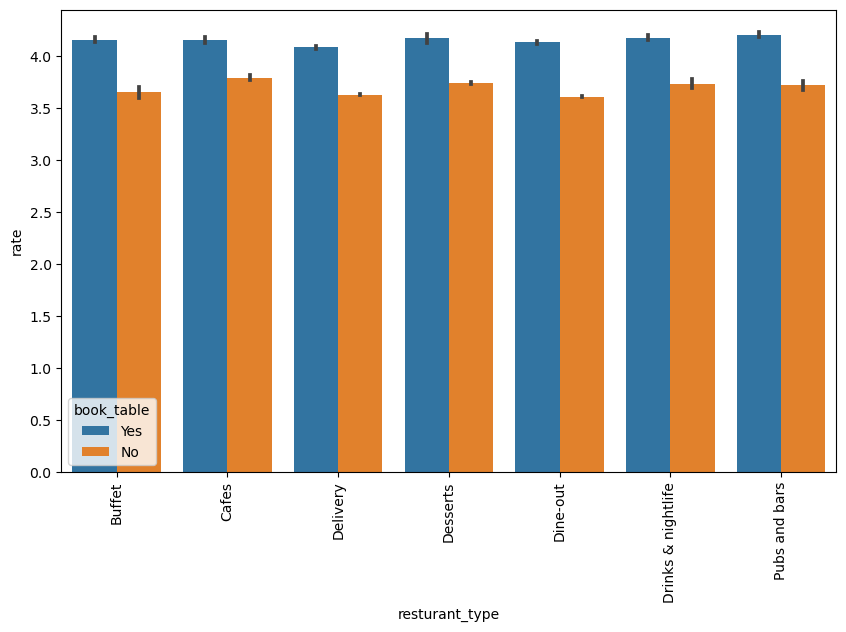

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(data = df, x = df['resturant_type'],
        y = df['rate'], hue =df['book_table'])
#plt.xlabel('Location')
#plt.ylabel('Count of Resturant')
#plt.title('Number pf resturant in each location')
plt.xticks(rotation=90)
plt.show()

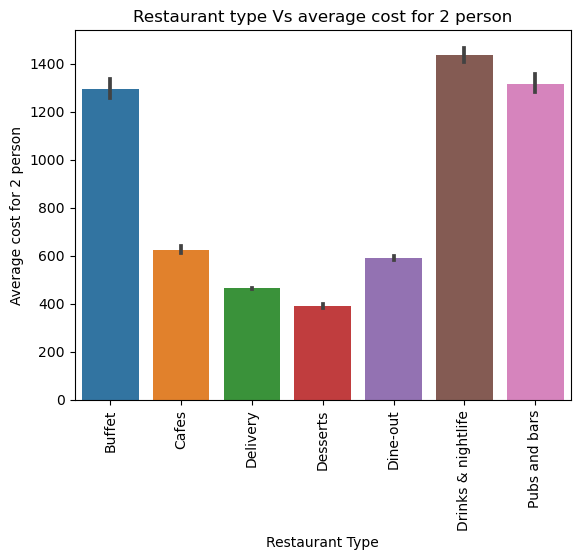

In [48]:
#Cost of Restaurant
#Features: costfor2
sns.barplot(data = df, x = df['resturant_type'],
        y = df['costfor2'])
plt.xlabel('Restaurant Type')
plt.ylabel('Average cost for 2 person')
plt.title('Restaurant type Vs average cost for 2 person')
plt.xticks(rotation=90)
plt.show()


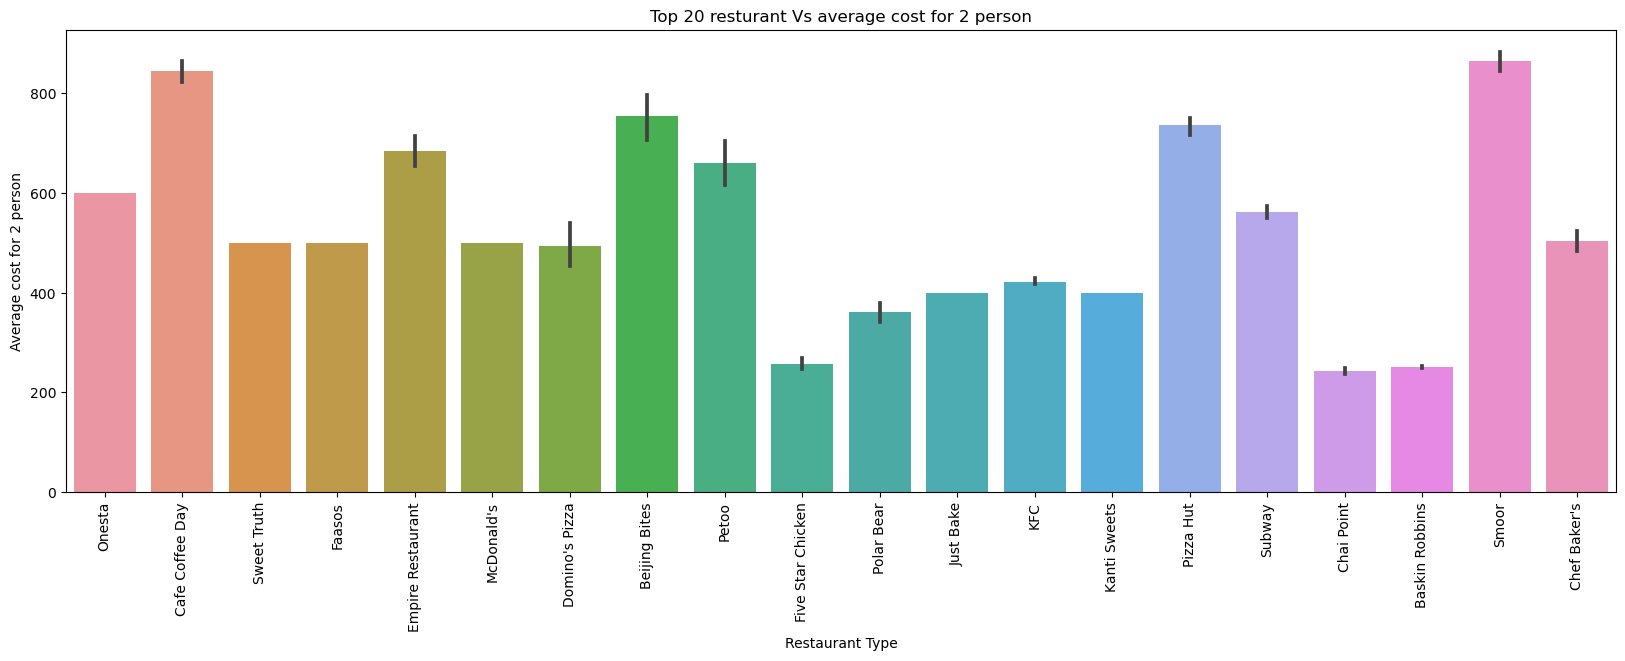

In [49]:
#Top 20 resturant Vs average cost for 2 person
plt.figure(figsize=(20, 6))
sns.barplot( data = top_20_rest,  x = top_20_rest['name'], y = top_20_rest['costfor2']) 
plt.xlabel('Restaurant Type')
plt.ylabel('Average cost for 2 person')
plt.title('Top 20 resturant Vs average cost for 2 person')
plt.xticks(rotation=90)
plt.show()


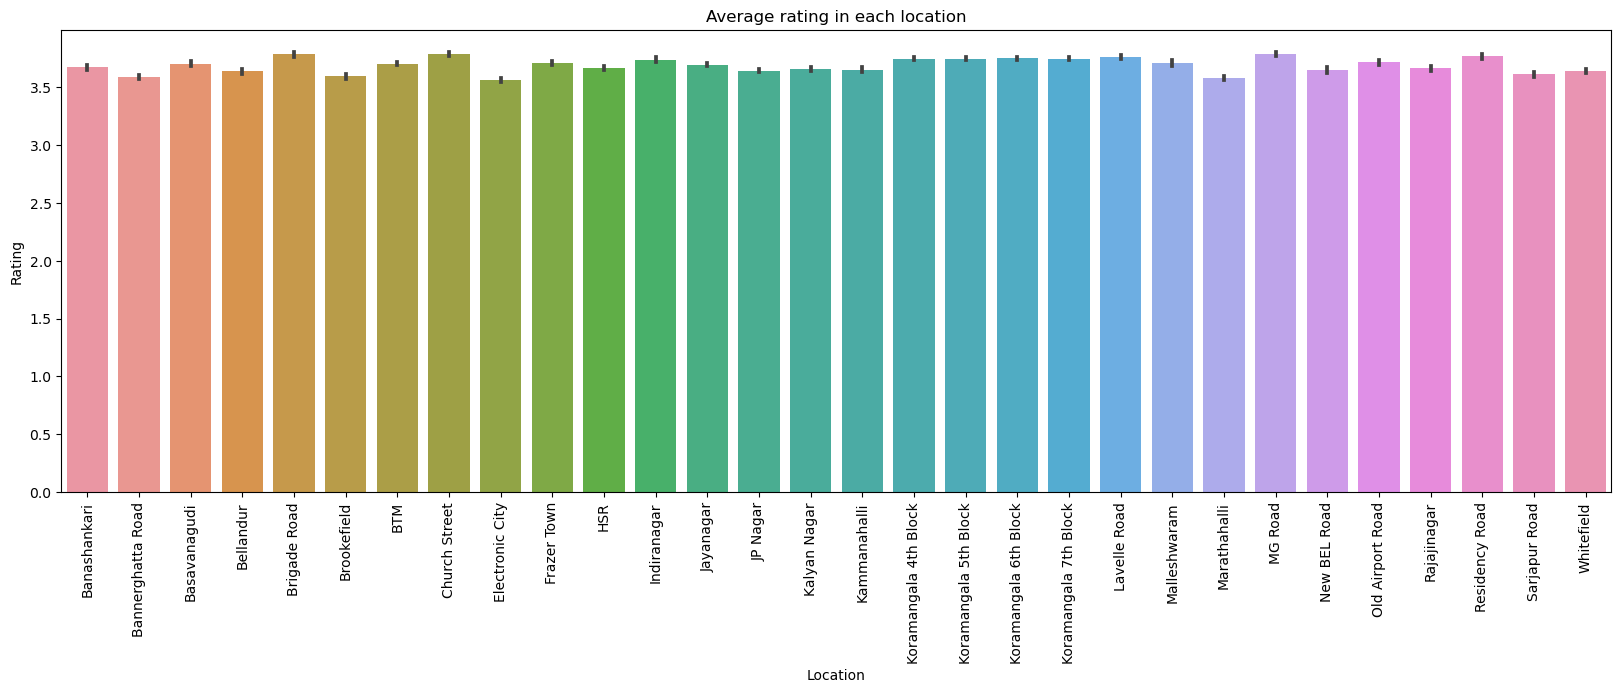

In [50]:
#Average rating in each location
#Featues : location_city , rate
plt.figure(figsize=(20, 6))
sns.barplot(x = df['location_city'],
        y = df['rate'])
plt.xlabel('Location')
plt.ylabel('Rating')
plt.title('Average rating in each location')
plt.xticks(rotation=90)
plt.show()

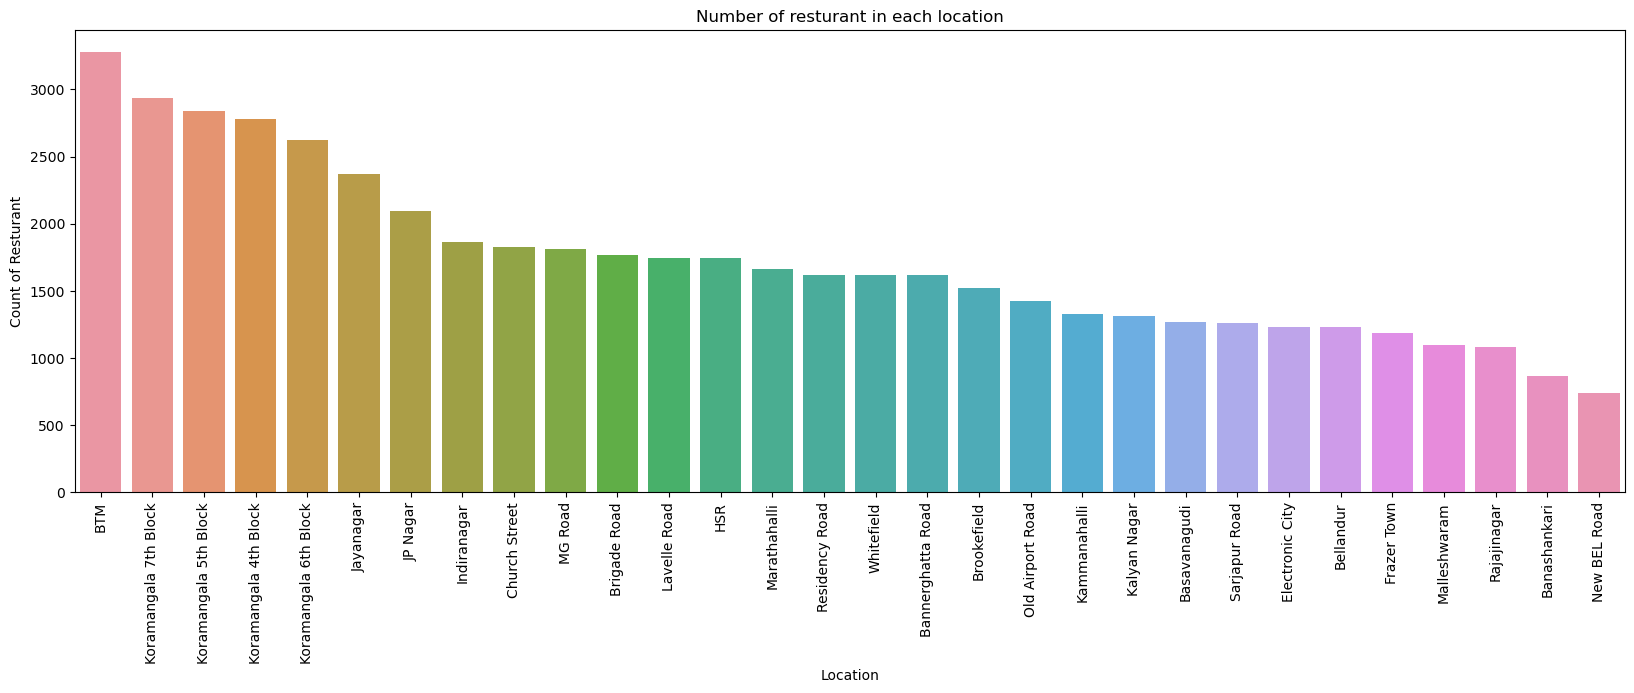

In [51]:
#No. of restaurants in a Location
#Featues : location_city , sum(location_city)
plt.figure(figsize=(20, 6))
sns.barplot(x = df['location_city'].value_counts().index,
        y = df['location_city'].value_counts().values)
plt.xlabel('Location')
plt.ylabel('Count of Resturant')
plt.title('Number of resturant in each location')
plt.xticks(rotation=90)
plt.show()

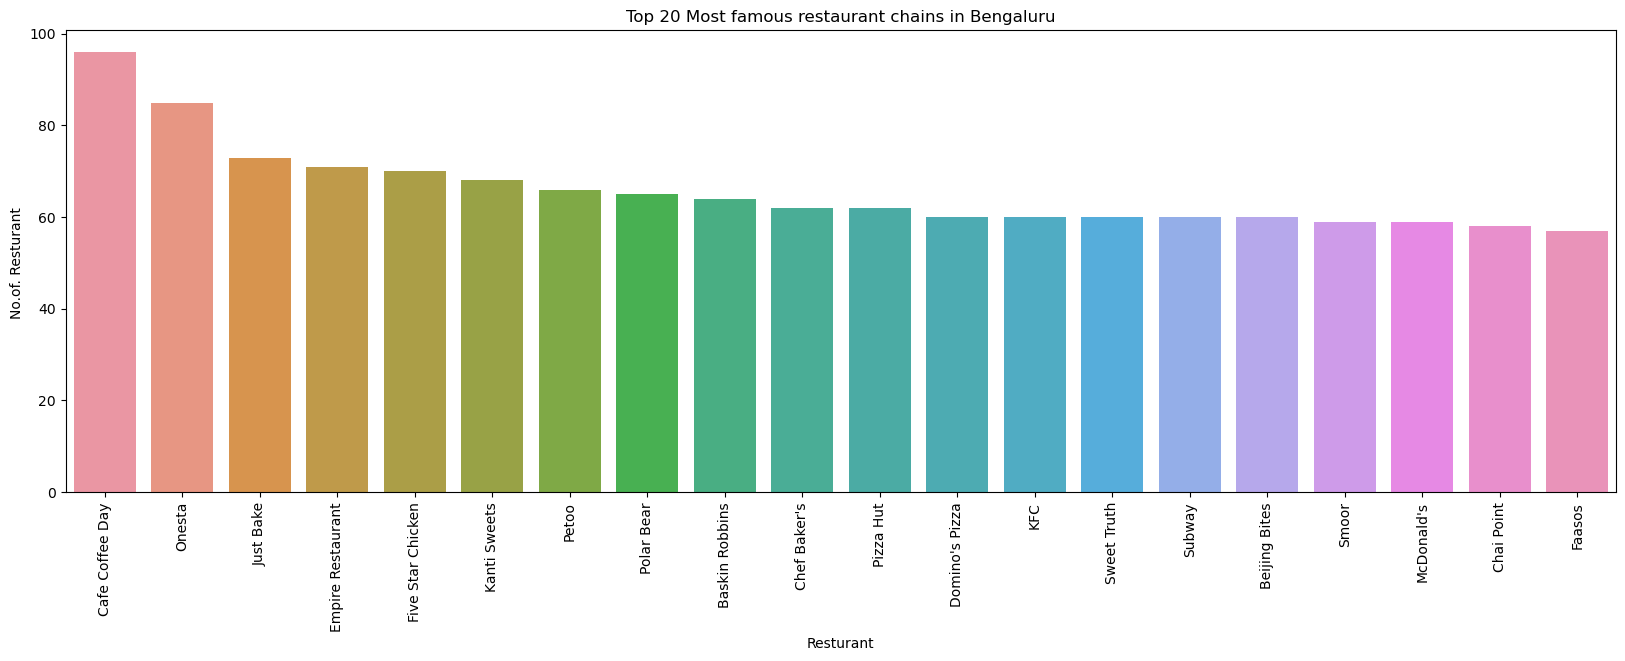

In [52]:
#Most famous restaurant chains in Bengaluru
plt.figure(figsize=(20, 6))
sns.barplot(x = df['name'].value_counts().head(20).index,
        y = df['name'].value_counts().head(20).values)
plt.xlabel('Resturant')
plt.ylabel('No.of. Resturant ')
plt.title('Top 20 Most famous restaurant chains in Bengaluru')
plt.xticks(rotation=90)
plt.show()

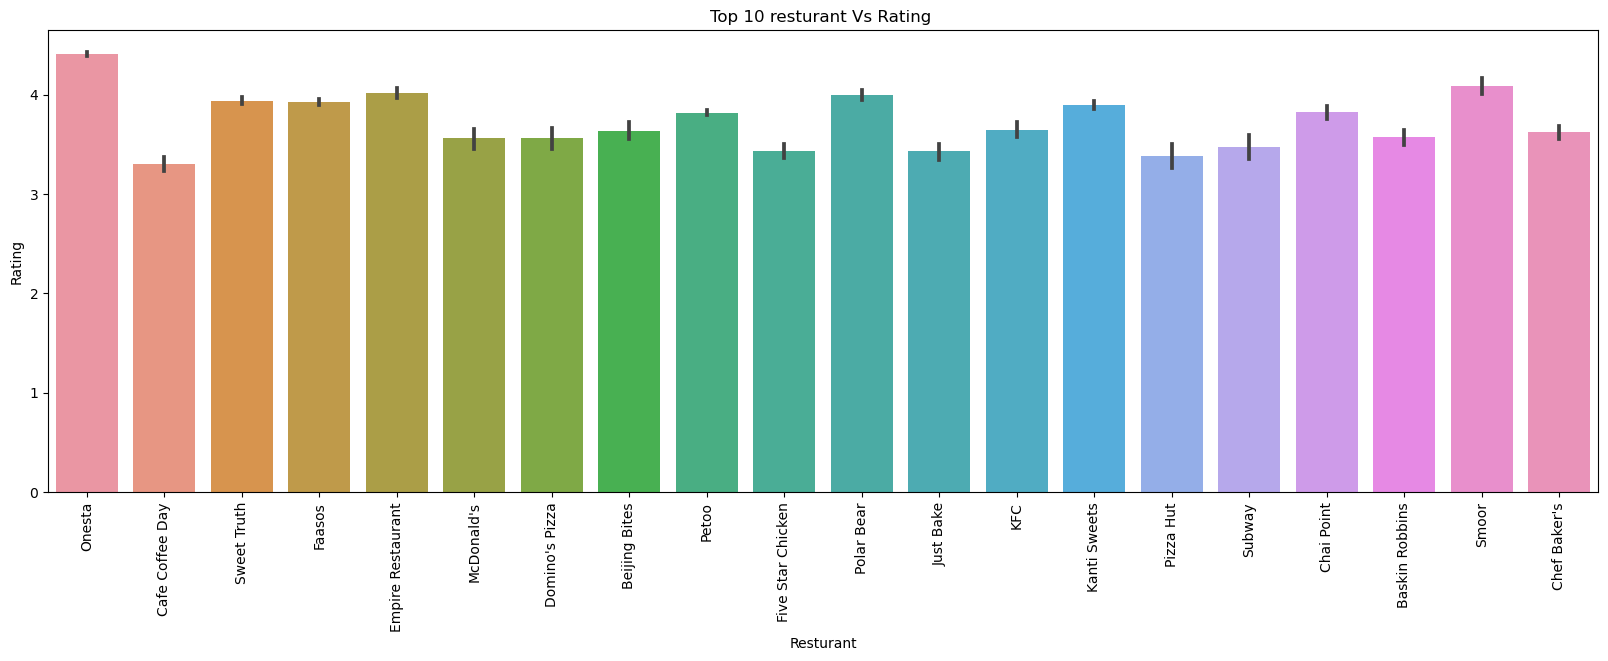

In [53]:
#Top 20 resturant Vs Rating 
plt.figure(figsize=(20, 6))
sns.barplot(data = top_20_rest, x = 'name',
        y = 'rate')
plt.xlabel('Resturant')
plt.ylabel('Rating')
plt.title('Top 10 resturant Vs Rating ')
plt.xticks(rotation=90)
plt.show()